# LOAN APPROVAL PREDICTION USING MACHINE LEARNING:
- This Project tries to predict whether the loan will be approved for an individual or not on the basis of features such as cibil score, education level, annual income etc.

## Loading required libraries:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Loading Dataset:

In [27]:
df = pd.read_csv(r'D:\games\New folder\loan_approval_dataset\loan_approval_dataset.csv')

## Checking Dataset:

In [28]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [29]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [30]:
df.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1406,1407,4,Graduate,No,7900000,31400000,8,698,16500000,11400000,28700000,5100000,Approved
2904,2905,3,Not Graduate,Yes,5200000,11000000,12,830,8900000,5100000,16000000,7600000,Approved
1651,1652,3,Not Graduate,No,6300000,23800000,10,760,12700000,1300000,18400000,8800000,Approved
2074,2075,3,Graduate,No,8300000,17200000,8,870,4700000,8800000,18300000,10000000,Approved
3785,3786,3,Graduate,No,7800000,16600000,20,896,12400000,10800000,30500000,5500000,Approved
3094,3095,3,Graduate,No,5900000,21200000,16,476,11700000,4800000,14800000,7700000,Rejected
2868,2869,0,Not Graduate,No,8900000,19100000,2,725,8300000,15000000,19000000,8800000,Approved
1312,1313,2,Not Graduate,No,9600000,25900000,18,647,11800000,9900000,35600000,11500000,Approved
1259,1260,2,Graduate,No,1800000,3800000,4,777,5100000,2700000,4600000,1400000,Approved
666,667,2,Graduate,Yes,1100000,3400000,10,426,300000,800000,3900000,1400000,Rejected


In [31]:
df.shape

(4269, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [33]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [34]:
df.duplicated().sum()

0

## Preprocessing and feature engineering:

In [111]:
df = df.drop(['loan_id'], axis = 1)

KeyError: "['loan_id'] not found in axis"

In [ ]:
df['income_to_loan_score'] = ((df[' income_annum']*df[' loan_term'])/df[' loan_amount'])*df[' cibil_score']

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[' education'] = oe.fit_transform(df[' education'].values.reshape(-1,1))
df[' self_employed'] = oe.fit_transform(df[' self_employed'].values.reshape(-1,1))
df[' loan_status'] = oe.fit_transform(df[' loan_status'].values.reshape(-1,1))
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_to_loan_score
0,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0,2997.511706
1,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0,1121.114754
2,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0,3100.740741
3,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0,997.889251
4,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0,3093.884298


<Axes: >

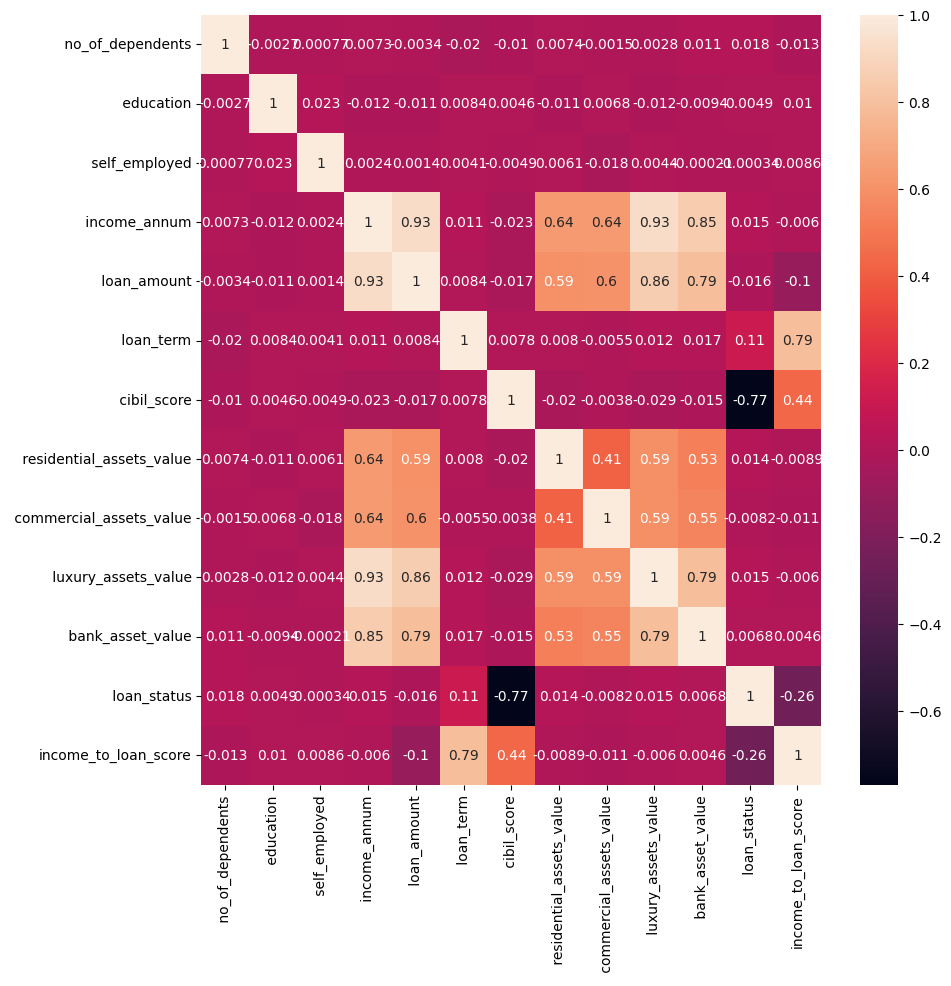

In [38]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

## Feature selection:

In [41]:
X = df.drop([' loan_status',' self_employed', ' education', ' bank_asset_value', ' commercial_assets_value'], axis = 1)
#X = df[[' cibil_score',' no_of_dependents',' education',' self_employed']]
y = df[' loan_status']

In [42]:
X.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' luxury_assets_value',
       'income_to_loan_score'],
      dtype='object')

## Scaling and Splitting train and test sets:

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

- The dataset has been divided into train set(80%) and test set(20%) so that we can validate our models' preformance.

## Training Models:

- Random Forest Classifier:

(0.9882903981264637,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x170f2279c60>)

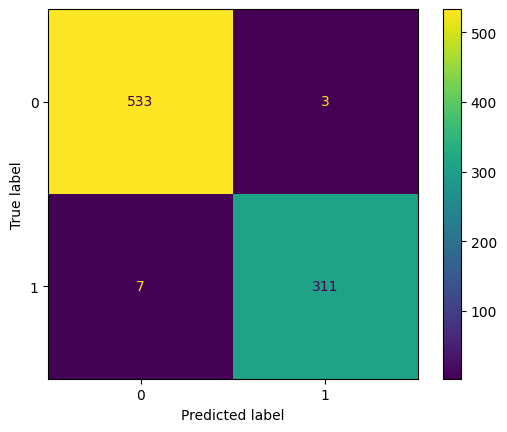

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
accuracy_score(ytest, rf_pred), ConfusionMatrixDisplay(confusion_matrix(ytest, rf_pred)).plot()

In [95]:
rf.feature_importances_

array([0.00721241, 0.01893473, 0.02798399, 0.06671759, 0.72163044,
       0.01713608, 0.01782072, 0.12256405])

- XGBoost Classifier:

(0.9929742388758782,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x170f0f36650>)

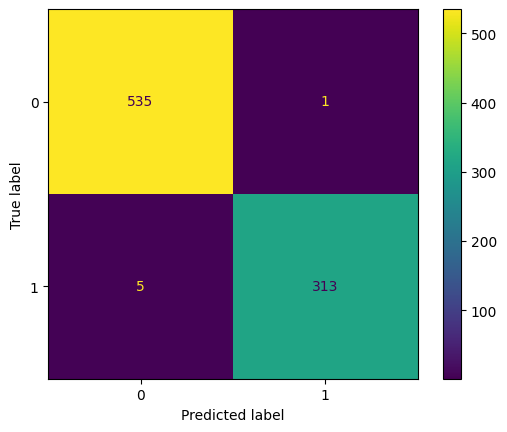

In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 1500, learning_rate = 0.01,objective= 'binary:logistic' ,random_state = 42)
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
accuracy_score(ytest, xgb_pred), ConfusionMatrixDisplay(confusion_matrix(ytest, xgb_pred)).plot()

- LightGBM Classifier:

(0.9929742388758782,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x170ef851db0>)

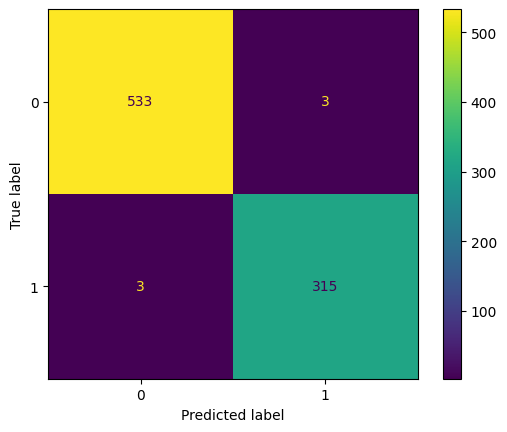

In [97]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(learning_rate=0.1, random_state=42)
lgb.fit(xtrain, ytrain)
lgb_pred = lgb.predict(xtest)
accuracy_score(ytest, lgb_pred), ConfusionMatrixDisplay(confusion_matrix(ytest, lgb_pred)).plot()

- CatBoost Classifier:

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier( n_estimators=650, eval_metric= 'Accuracy',random_state=42)
cb.fit(xtrain, ytrain)
cb_pred = cb.predict(xtest)
accuracy_score(ytest, cb_pred), ConfusionMatrixDisplay(confusion_matrix(ytest, cb_pred)).plot()

- As we have trained some base models and have got best accuracy of 0.9929 from XGBoost and LightGBM classifiers, let us try to enhance our predictions' accuracy by ensembling these models:

## Ensembling: 

Learning rate set to 0.025837
0:	learn: 0.9484627	total: 3.03ms	remaining: 1.96s
1:	learn: 0.9551977	total: 5.55ms	remaining: 1.8s
2:	learn: 0.9592972	total: 8.44ms	remaining: 1.82s
3:	learn: 0.9601757	total: 12.1ms	remaining: 1.96s
4:	learn: 0.9622255	total: 15.5ms	remaining: 2s
5:	learn: 0.9669107	total: 19.4ms	remaining: 2.08s
6:	learn: 0.9674963	total: 22.3ms	remaining: 2.05s
7:	learn: 0.9672035	total: 25.9ms	remaining: 2.08s
8:	learn: 0.9698389	total: 28.9ms	remaining: 2.06s
9:	learn: 0.9698389	total: 31.8ms	remaining: 2.04s
10:	learn: 0.9783309	total: 35.3ms	remaining: 2.05s
11:	learn: 0.9777452	total: 38.1ms	remaining: 2.03s
12:	learn: 0.9800878	total: 41.4ms	remaining: 2.03s
13:	learn: 0.9786237	total: 43.6ms	remaining: 1.98s
14:	learn: 0.9786237	total: 46.6ms	remaining: 1.97s
15:	learn: 0.9783309	total: 51.2ms	remaining: 2.03s
16:	learn: 0.9800878	total: 54ms	remaining: 2.01s
17:	learn: 0.9803807	total: 57.7ms	remaining: 2.02s
18:	learn: 0.9806735	total: 60.6ms	remaining: 2.01

(0.9941451990632318,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x170f5eabfa0>)

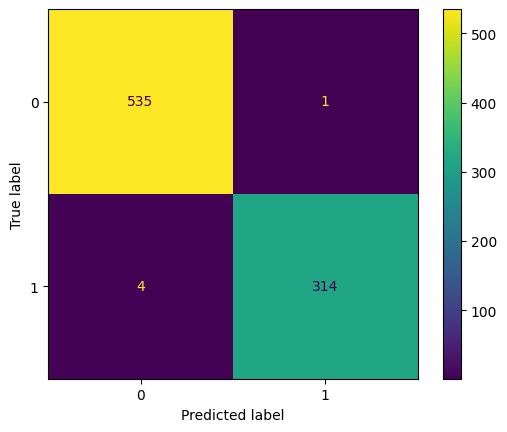

In [113]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('rf', rf),('xgb', xgb), ('lgb', lgb), ('cb', cb)], voting='soft')
vc.fit(xtrain, ytrain)
vc_pred = vc.predict(xtest)
accuracy_score(ytest, vc_pred), ConfusionMatrixDisplay(confusion_matrix(ytest, vc_pred)).plot()

- Hence, by ensembling all these base models, we have got an accurcay of 99.41%